In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
my_data = pd.read_csv("E:/Dataset/P14-Logistic-Regression/Logistic_Regression/Social_Network_Ads.csv")
my_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [4]:
my_data['Gender'] = label.fit_transform(my_data['Gender'])
my_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [5]:
x_data = my_data.iloc[:,1:-1].values
y_data = my_data.iloc[:,-1].values

In [41]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [42]:
new_x = scale.fit_transform(x_data)

In [43]:
new_x

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [6]:
x_data

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [7]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [9]:
n_data, n_features = x_data.shape

In [10]:
X = torch.Tensor(torch.from_numpy(x_data.astype(np.float32)))
y = torch.Tensor(torch.from_numpy(y_data.astype(np.float32)))

In [44]:
NEWX = torch.Tensor(torch.from_numpy(new_x.astype(np.float32)))

In [12]:
X,y

(tensor([[1.0000e+00, 1.9000e+01, 1.9000e+04],
         [1.0000e+00, 3.5000e+01, 2.0000e+04],
         [0.0000e+00, 2.6000e+01, 4.3000e+04],
         ...,
         [0.0000e+00, 5.0000e+01, 2.0000e+04],
         [1.0000e+00, 3.6000e+01, 3.3000e+04],
         [0.0000e+00, 4.9000e+01, 3.6000e+04]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [13]:
X.shape,y.shape

(torch.Size([400, 3]), torch.Size([400]))

In [14]:
y = y.view(y.shape[0],1)

In [15]:
y.shape

torch.Size([400, 1])

In [20]:
class logic(nn.Module):
                     def __init__(self):
                            super(logic,self).__init__()
                            self.linear = nn.Linear(3,1)
                     def forward(self,x):
                            pred = torch.sigmoid(self.linear(x))
                            return pred


In [56]:
model = logic()
criteria = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [57]:
for i in range(1,501):
                out = model.forward(NEWX)
                loss = criteria(out,y)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                if i%10==0:
                     print(f"epochs {i} and loss {loss.item()}")
with torch.no_grad():
        y_predicted = model(NEWX)
        y_predicted_cls = y_predicted.round()
        acc = y_predicted_cls.eq(y).sum()/len(y)
        print(f"the accuracy is {acc}")
                

epochs 10 and loss 0.827497661113739
epochs 20 and loss 0.8078815340995789
epochs 30 and loss 0.7891923785209656
epochs 40 and loss 0.7713993191719055
epochs 50 and loss 0.7544703483581543
epochs 60 and loss 0.7383724451065063
epochs 70 and loss 0.7230715751647949
epochs 80 and loss 0.708533525466919
epochs 90 and loss 0.6947241425514221
epochs 100 and loss 0.681609034538269
epochs 110 and loss 0.6691545844078064
epochs 120 and loss 0.6573275923728943
epochs 130 and loss 0.6460955739021301
epochs 140 and loss 0.6354272961616516
epochs 150 and loss 0.6252923011779785
epochs 160 and loss 0.6156613826751709
epochs 170 and loss 0.6065065264701843
epochs 180 and loss 0.5978010296821594
epochs 190 and loss 0.5895195603370667
epochs 200 and loss 0.5816377997398376
epochs 210 and loss 0.5741328001022339
epochs 220 and loss 0.5669829845428467
epochs 230 and loss 0.5601679086685181
epochs 240 and loss 0.5536684393882751
epochs 250 and loss 0.5474663376808167
epochs 260 and loss 0.541544556617736

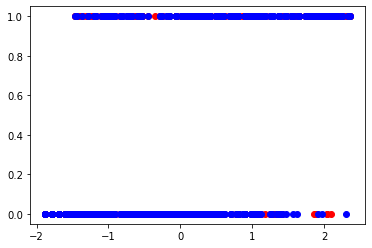

In [59]:
output = model(NEWX).round().detach().numpy()
plt.plot(NEWX,y,'ro')
plt.plot(NEWX,output,'bo')

In [33]:
from sklearn.linear_model import LogisticRegression

hj = LogisticRegression()

In [51]:
model =hj.fit(NEWX,y_data)

In [52]:
j=model.predict(NEWX)

In [53]:
import sklearn
sklearn.metrics.confusion_matrix(j,y_data)

array([[237,  39],
       [ 20, 104]], dtype=int64)

In [54]:
(257+104)/(257+143)

0.9025

In [55]:
x_data

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)